In [34]:
import pandas as pd
import numpy as np

In [35]:
primeira_alteracao = pd.read_csv('PNS_2019.csv', usecols = ["V0001", "V0020", "V0026", "A02201", "A02305", "A02306", "A02307", "A02308", "C006", "C008", "P050", "P052", "P05404", "P05407", "P05410", "P05413", "P05416", "Q074", "Q075", "Q076", "Q07601", "Q07704", "Q07705", "Q07706", "Q07707", "Q07708", "Q07709", "Q07710", "Q07711", "Q078", "Q11606", "Q11607", "Q11701", "Q11806", "Q11807", "Q11808", "Q11809", "Q119", "J00402", "J007", "VDP001", "C009", "E001", "E01602", "VDF004", "D01301", "VDD004A", "E01401", "E01201", "J00404"]
)

In [36]:
primeira_alteracao.to_csv('primeira_alteracao.csv', index = False)

In [37]:
segunda_alteracao = pd.read_csv('primeira_alteracao.csv', usecols = [    "V0001",    "V0020",    "V0026",    "C006",    "C008",    "P050",    "P052",    "P05404",    "P05407",    "P05413",    "Q074",    "Q075",    "Q076",    "Q078",    "Q11606",    "Q11607",    "Q11701",    "Q119",    "J007",    "VDP001",    "P05416",    "P05410"]
)

In [38]:
segunda_alteracao.to_csv('segunda_alteracao.csv', index = False)

In [39]:
df = pd.read_csv('segunda_alteracao.csv')

In [40]:
df.describe()

,V0001,V0020,V0026,C006,C008,J007,P050,P052,P05404,P05407,...,P05416,Q074,Q075,Q076,Q078,Q11606,Q11607,Q11701,Q119,VDP001
count,293726.000000,293726.0,293726.000000,279382.000000,279382.000000,279382.000000,90846.000000,79460.000000,11386.000000,11386.000000,...,11386.000000,90846.000000,4467.000000,4467.000000,4467.000000,1279.000000,1279.000000,1279.000000,1279.000000,8149.000000
mean,28.844716,2019.0,1.236843,1.518788,35.267651,1.714287,2.762389,2.427888,3.646320,4.966801,...,4.948972,1.950829,16.822028,1.633311,1.602642,1.512119,1.731040,37.182174,1.922596,1.364216
std,11.762108,0.0,0.425146,0.499648,21.675970,0.451754,0.636955,0.882790,1.851224,0.328616,...,0.373632,0.216226,18.272858,0.481955,0.962076,0.500049,0.443593,24.660394,1.212009,0.509002
min,11.000000,2019.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,21.000000,2019.0,1.000000,1.000000,17.000000,1.000000,3.000000,1.000000,1.000000,5.000000,...,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000
50%,27.000000,2019.0,1.000000,2.000000,34.000000,2.000000,3.000000,3.000000,5.000000,5.000000,...,5.000000,2.000000,10.000000,2.000000,1.000000,2.000000,2.000000,40.000000,1.000000,1.000000
75%,35.000000,2019.0,1.000000,2.000000,52.000000,2.000000,3.000000,3.000000,5.000000,5.000000,...,5.000000,2.000000,25.000000,2.000000,2.000000,2.000000,2.000000,57.000000,3.000000,2.000000
max,53.000000,2019.0,2.000000,2.000000,112.000000,2.000000,3.000000,3.000000,5.000000,5.000000,...,5.000000,2.000000,94.000000,2.000000,5.000000,2.000000,2.000000,94.000000,5.000000,3.000000


In [41]:
colunas_verificar = ['Q074','Q11606','Q11607']
df_sem_nulos = df.dropna(subset=colunas_verificar, how='all')

In [42]:
df_sem_nulos[['Q074','Q11606','Q11607']].value_counts(dropna=False)

Q074  Q11606  Q11607
2.0   NaN     NaN       85548
1.0   NaN     NaN        4019
      1.0     2.0         319
2.0   2.0     2.0         287
      1.0     2.0         272
      2.0     1.0         254
1.0   2.0     1.0          57
              2.0          57
2.0   1.0     1.0          18
1.0   1.0     1.0          15
Name: count, dtype: int64

In [43]:
df_filtrado = df_sem_nulos.drop(df_sem_nulos[((df_sem_nulos['Q074'] == 2.0) & (df_sem_nulos['Q11606'].isna()) & (df_sem_nulos['Q11607'].isna())) |
                                             ((df_sem_nulos['Q11606'] == 2.0) & (df_sem_nulos['Q074'].isna()) & (df_sem_nulos['Q11607'].isna())) |
                                             ((df_sem_nulos['Q11607'] == 2.0) & (df_sem_nulos['Q074'].isna()) & (df_sem_nulos['Q11606'].isna())) |
                                             ((df_sem_nulos['Q074'] == 2.0) & (df_sem_nulos['Q11606'] == 2.0) & (df_sem_nulos['Q11607'].isna())) |
                                             ((df_sem_nulos['Q074'] == 2.0) & (df_sem_nulos['Q11607'] == 2.0) & (df_sem_nulos['Q11606'].isna())) |
                                             ((df_sem_nulos['Q11606'] == 2.0) & (df_sem_nulos['Q11607'] == 2.0) & (df_sem_nulos['Q074'].isna())) |
                                             ((df_sem_nulos['Q074'] == 2.0) & (df_sem_nulos['Q11606'] == 2.0) & (df_sem_nulos['Q11607'].isna())) |
                                             ((df_sem_nulos['Q074'] == 2.0) & (df_sem_nulos['Q11607'] == 2.0) & (df_sem_nulos['Q11606'].isna())) |
                                             ((df_sem_nulos['Q11606'] == 2.0) & (df_sem_nulos['Q11607'] == 2.0) & (df_sem_nulos['Q074'].isna())) |
                                             ((df_sem_nulos['Q074'] == 2.0) & (df_sem_nulos['Q11606'] == 2.0) & (df_sem_nulos['Q11607'] == 2.0))].index)

In [44]:
df_filtrado[['Q074','Q11606','Q11607']].value_counts(dropna=False)

Q074  Q11606  Q11607
1.0   NaN     NaN       4019
      1.0     2.0        319
2.0   1.0     2.0        272
      2.0     1.0        254
1.0   2.0     1.0         57
              2.0         57
2.0   1.0     1.0         18
1.0   1.0     1.0         15
Name: count, dtype: int64

In [45]:
df_filtrado.describe()

,V0001,V0020,V0026,C006,C008,J007,P050,P052,P05404,P05407,...,P05416,Q074,Q075,Q076,Q078,Q11606,Q11607,Q11701,Q119,VDP001
count,5011.000000,5011.0,5011.000000,5011.000000,5011.000000,5011.0,5011.000000,4360.000000,651.000000,651.000000,...,651.000000,5011.000000,4467.000000,4467.000000,4467.000000,992.000000,992.000000,992.000000,992.000000,505.000000
mean,30.789463,2019.0,1.176811,1.614847,45.050289,1.0,2.755139,2.328670,3.897081,4.941628,...,4.903226,1.108561,16.822028,1.633311,1.602642,1.370968,1.653226,32.732863,1.918347,1.340594
std,11.523619,0.0,0.381547,0.486680,18.210004,0.0,0.644113,0.923305,1.716035,0.453672,...,0.506729,0.311119,18.272858,0.481955,0.962076,0.483308,0.476183,24.176032,1.218089,0.506736
min,11.000000,2019.0,1.000000,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,23.000000,2019.0,1.000000,1.000000,30.000000,1.0,3.000000,1.000000,2.000000,5.000000,...,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000
50%,31.000000,2019.0,1.000000,2.000000,43.000000,1.0,3.000000,3.000000,5.000000,5.000000,...,5.000000,1.000000,10.000000,2.000000,1.000000,1.000000,2.000000,30.000000,1.000000,1.000000
75%,41.000000,2019.0,1.000000,2.000000,59.000000,1.0,3.000000,3.000000,5.000000,5.000000,...,5.000000,1.000000,25.000000,2.000000,2.000000,2.000000,2.000000,51.000000,3.000000,2.000000
max,53.000000,2019.0,2.000000,2.000000,100.000000,1.0,3.000000,3.000000,5.000000,5.000000,...,5.000000,2.000000,94.000000,2.000000,5.000000,2.000000,2.000000,94.000000,5.000000,3.000000


In [46]:
df_filtrado.to_csv('terceira_alteracao.csv', index = False)

In [47]:
df = pd.read_csv('terceira_alteracao.csv')

In [48]:
# Renomeação da coluna V0026 para Sit_Urbano_Rural
df.rename(columns={'V0026': 'Sit_Urbano_Rural'}, inplace=True)

# Mapeamento dos valores para "urbano" e "rural"
df['Sit_Urbano_Rural'] = pd.Categorical(df['Sit_Urbano_Rural'].map({1: 'urbano', 2: 'rural'}), categories=['urbano', 'rural'])

# Sumário da variável Sit_Urbano_Rural
print(df['Sit_Urbano_Rural'].value_counts())

# Renomeação da coluna C006 para Sexo
df.rename(columns={'C006': 'Sexo'}, inplace=True)

# Mapeamento dos valores para "Masculino" e "Feminino"
df['Sexo'] = pd.Categorical(df['Sexo'].map({1: 'Masculino', 2: 'Feminino'}), categories=['Masculino', 'Feminino'])

# Sumário da variável Sexo
print(df['Sexo'].value_counts())

# Criando a coluna faixa_idade
df['faixa_idade'] = pd.cut(df['C008'],
                                  bins=[18, 30, 45, 60, 75, float('inf')],
                                  labels=["18 a 29 anos", "30 a 44 anos", "45 a 59 anos", "60 a 74 anos", "75 anos ou mais"],
                                  right=False,
                                  ordered=True)

# Sumário da variável faixa_idade
print(df['faixa_idade'].value_counts())

Sit_Urbano_Rural
urbano    4125
rural      886
Name: count, dtype: int64
Sexo
Feminino     3081
Masculino    1930
Name: count, dtype: int64
faixa_idade
30 a 44 anos       1450
45 a 59 anos       1189
18 a 29 anos        994
60 a 74 anos        857
75 anos ou mais     336
Name: count, dtype: int64


In [49]:
# Renomeação da coluna V0001 para Unidades_da_Federacao
df.rename(columns={'V0001': 'Unidades_da_Federacao'}, inplace=True)

# Mapeamento dos valores para os estados brasileiros
df['Unidades_da_Federacao'] = pd.Categorical(df['Unidades_da_Federacao'].map({
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins', 
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}))

# Sumário da variável Unidades_da_Federacao
print(df['Unidades_da_Federacao'].value_counts())

# Definindo um dicionário com as correspondências entre estados e grandes regiões
regioes = {
    'Norte': ["Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins"],
    'Nordeste': ["Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco", "Alagoas", "Sergipe", "Bahia"],
    'Sudeste': ["Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo"],
    'Sul': ["Paraná", "Santa Catarina", "Rio Grande do Sul"],
    'Centro-Oeste': ["Mato Grosso do Sul", "Mato Grosso", "Goiás", "Distrito Federal"]
}

# Criando a coluna GrandesRegioes
df['GrandesRegioes'] = df['Unidades_da_Federacao'].apply(lambda x: next((k for k, v in regioes.items() if x in v), None))

# Sumário da variável GrandesRegioes
print(df['GrandesRegioes'].value_counts())

# Definindo um dicionário com as correspondências entre estados e capitais
capitais = {
    "Rondônia": "Porto Velho", 
    "Roraima": "Boa Vista",              
    "Acre": "Rio Branco", 
    "Amazonas": "Manaus",
    "Pará": "Belém",
    "Amapá": "Macapá",
    "Tocantins": "Palmas",
    "Maranhão": "São Luís",
    "Piauí": "Teresina",
    "Ceará": "Fortaleza",
    "Rio Grande do Norte": "Natal",
    "Paraíba": "João Pessoa",
    "Pernambuco": "Recife",
    "Alagoas": "Maceió",
    "Sergipe": "Aracaju",
    "Bahia": "Salvador",
    "Minas Gerais": "Belo Horizonte",
    "Espírito Santo": "Vitória",
    "Rio de Janeiro": "Rio de Janeiro",
    "São Paulo": "São Paulo",
    "Paraná": "Curitiba",
    "Santa Catarina": "Florianópolis",
    "Rio Grande do Sul": "Porto Alegre",
    "Mato Grosso do Sul": "Campo Grande",
    "Mato Grosso": "Cuiabá",
    "Goiás": "Goiânia",
    "Distrito Federal": "Brasília"
}

# Criando a coluna Capital
df['Capital'] = df['Unidades_da_Federacao'].map(capitais)

# Sumário da variável Capital
print(df['Capital'].value_counts())

Unidades_da_Federacao
São Paulo              454
Rio Grande do Sul      355
Minas Gerais           352
Rio de Janeiro         268
Espírito Santo         250
Santa Catarina         237
Paraná                 223
Ceará                  217
Pernambuco             208
Pará                   200
Maranhão               192
Rio Grande do Norte    173
Goiás                  170
Amazonas               168
Mato Grosso do Sul     167
Piauí                  139
Paraíba                135
Distrito Federal       134
Bahia                  132
Sergipe                124
Alagoas                124
Roraima                115
Acre                   103
Amapá                  101
Rondônia               100
Tocantins               91
Mato Grosso             79
Name: count, dtype: int64
GrandesRegioes
Nordeste        1444
Sudeste         1324
Norte            878
Sul              815
Centro-Oeste     550
Name: count, dtype: int64
Capital
São Paulo         454
Porto Alegre      355
Belo Horizonte    352
Rio

In [50]:
df

,Unidades_da_Federacao,V0020,Sit_Urbano_Rural,Sexo,C008,J007,P050,P052,P05404,P05407,...,Q076,Q078,Q11606,Q11607,Q11701,Q119,VDP001,faixa_idade,GrandesRegioes,Capital
0,Rondônia,2019,urbano,Feminino,33.0,1.0,3.0,3.0,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,30 a 44 anos,Norte,Porto Velho
1,Rondônia,2019,urbano,Feminino,57.0,1.0,3.0,3.0,NaN,NaN,...,NaN,NaN,2.0,1.0,55.0,1.0,NaN,45 a 59 anos,Norte,Porto Velho
2,Rondônia,2019,urbano,Feminino,25.0,1.0,3.0,3.0,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,18 a 29 anos,Norte,Porto Velho
3,Rondônia,2019,urbano,Masculino,24.0,1.0,3.0,3.0,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,18 a 29 anos,Norte,Porto Velho
4,Rondônia,2019,urbano,Feminino,50.0,1.0,3.0,1.0,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,45 a 59 anos,Norte,Porto Velho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,Distrito Federal,2019,rural,Feminino,41.0,1.0,3.0,3.0,NaN,NaN,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,30 a 44 anos,Centro-Oeste,Brasília
5007,Distrito Federal,2019,rural,Masculino,18.0,1.0,3.0,3.0,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,18 a 29 anos,Centro-Oeste,Brasília
5008,Distrito Federal,2019,rural,Masculino,49.0,1.0,3.0,1.0,NaN,NaN,...,2.0,1.0,1.0,2.0,10.0,1.0,NaN,45 a 59 anos,Centro-Oeste,Brasília
5009,Distrito Federal,2019,rural,Feminino,51.0,1.0,3.0,3.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,45 a 59 anos,Centro-Oeste,Brasília


In [51]:
df.drop('J007', axis=1, inplace=True)
df.drop('Q076', axis=1, inplace=True)
df.drop('P05404', axis=1, inplace=True)
df.drop('P05407', axis=1, inplace=True)
df.drop('P05410', axis=1, inplace=True)
df.drop('P05413', axis=1, inplace=True)
df.drop('Q078', axis=1, inplace=True)
df.drop('Q119', axis=1, inplace=True)
df.drop('VDP001', axis=1, inplace=True)
df.drop('P05416', axis=1, inplace=True)

df

,Unidades_da_Federacao,V0020,Sit_Urbano_Rural,Sexo,C008,P050,P052,Q074,Q075,Q11606,Q11607,Q11701,faixa_idade,GrandesRegioes,Capital
0,Rondônia,2019,urbano,Feminino,33.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,30 a 44 anos,Norte,Porto Velho
1,Rondônia,2019,urbano,Feminino,57.0,3.0,3.0,2.0,NaN,2.0,1.0,55.0,45 a 59 anos,Norte,Porto Velho
2,Rondônia,2019,urbano,Feminino,25.0,3.0,3.0,1.0,0.0,NaN,NaN,NaN,18 a 29 anos,Norte,Porto Velho
3,Rondônia,2019,urbano,Masculino,24.0,3.0,3.0,1.0,12.0,NaN,NaN,NaN,18 a 29 anos,Norte,Porto Velho
4,Rondônia,2019,urbano,Feminino,50.0,3.0,1.0,1.0,10.0,NaN,NaN,NaN,45 a 59 anos,Norte,Porto Velho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,Distrito Federal,2019,rural,Feminino,41.0,3.0,3.0,1.0,20.0,NaN,NaN,NaN,30 a 44 anos,Centro-Oeste,Brasília
5007,Distrito Federal,2019,rural,Masculino,18.0,3.0,3.0,1.0,0.0,NaN,NaN,NaN,18 a 29 anos,Centro-Oeste,Brasília
5008,Distrito Federal,2019,rural,Masculino,49.0,3.0,1.0,1.0,10.0,1.0,2.0,10.0,45 a 59 anos,Centro-Oeste,Brasília
5009,Distrito Federal,2019,rural,Feminino,51.0,3.0,3.0,1.0,23.0,NaN,NaN,NaN,45 a 59 anos,Centro-Oeste,Brasília


In [52]:
# Renomeação de colunas
df.rename(columns={
    'C008': 'Idade',
    'P050': 'Atualmente_Fuma_Tabaco',
    'P052': 'Passado_Fuma_Tabaco',
    'Q075': 'Idade_Primeiro_Diagnostico_de_Asma',
    'Q11606': 'Diagnostico_de_Bronquite_Cronica',
    'Q11607': 'Diagnostico_de_Outro',
    'Q11701': 'Idade_Primeiro_Diagnostico_de_Doenca_Pulmao',
    'Q074': 'Diagnostico_de_Asma_ou_Bronquite'
}, inplace=True)

# Mapeamento dos valores da coluna 'Atualmente_Fuma_Tabaco' para "sim" e "não"
df['Atualmente_Fuma_Tabaco'] = pd.Categorical(df['Atualmente_Fuma_Tabaco'].map({
    1: 'sim', 2: 'sim', 3: 'não'
}), categories=['sim', 'não'])

# Mapeamento dos valores da coluna 'Passado_Fuma_Tabaco' para "sim" e "não"
df['Passado_Fuma_Tabaco'] = pd.Categorical(df['Passado_Fuma_Tabaco'].map({
    1: 'sim', 2: 'sim', 3: 'não'
}), categories=['sim', 'não'])

# Mapeamento dos valores da coluna 'Diagnostico_de_Outro' para "sim" e "não"
df['Diagnostico_de_Outro'] = pd.Categorical(df['Diagnostico_de_Outro'].map({
    1: 'sim', 2: 'não'
}), categories=['sim', 'não'])

# Mapeamento dos valores da coluna 'Diagnostico_de_Asma_ou_Bronquite' para "sim" e "não"
df['Diagnostico_de_Asma_ou_Bronquite'] = pd.Categorical(df['Diagnostico_de_Asma_ou_Bronquite'].map({
    1: 'sim', 2: 'não'
}), categories=['sim', 'não'])


In [53]:
df

,Unidades_da_Federacao,V0020,Sit_Urbano_Rural,Sexo,Idade,Atualmente_Fuma_Tabaco,Passado_Fuma_Tabaco,Diagnostico_de_Asma_ou_Bronquite,Idade_Primeiro_Diagnostico_de_Asma,Diagnostico_de_Bronquite_Cronica,Diagnostico_de_Outro,Idade_Primeiro_Diagnostico_de_Doenca_Pulmao,faixa_idade,GrandesRegioes,Capital
0,Rondônia,2019,urbano,Feminino,33.0,não,não,sim,3.0,NaN,NaN,NaN,30 a 44 anos,Norte,Porto Velho
1,Rondônia,2019,urbano,Feminino,57.0,não,não,não,NaN,2.0,sim,55.0,45 a 59 anos,Norte,Porto Velho
2,Rondônia,2019,urbano,Feminino,25.0,não,não,sim,0.0,NaN,NaN,NaN,18 a 29 anos,Norte,Porto Velho
3,Rondônia,2019,urbano,Masculino,24.0,não,não,sim,12.0,NaN,NaN,NaN,18 a 29 anos,Norte,Porto Velho
4,Rondônia,2019,urbano,Feminino,50.0,não,sim,sim,10.0,NaN,NaN,NaN,45 a 59 anos,Norte,Porto Velho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,Distrito Federal,2019,rural,Feminino,41.0,não,não,sim,20.0,NaN,NaN,NaN,30 a 44 anos,Centro-Oeste,Brasília
5007,Distrito Federal,2019,rural,Masculino,18.0,não,não,sim,0.0,NaN,NaN,NaN,18 a 29 anos,Centro-Oeste,Brasília
5008,Distrito Federal,2019,rural,Masculino,49.0,não,sim,sim,10.0,1.0,não,10.0,45 a 59 anos,Centro-Oeste,Brasília
5009,Distrito Federal,2019,rural,Feminino,51.0,não,não,sim,23.0,NaN,NaN,NaN,45 a 59 anos,Centro-Oeste,Brasília


In [54]:
df.to_csv('categoricos.csv', index = False)

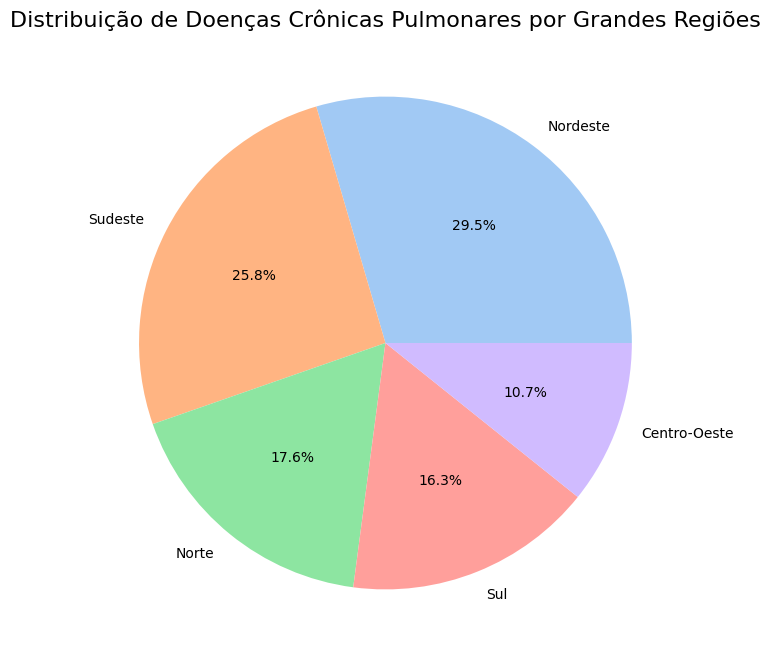

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por região
contagem_sim = df_sim["GrandesRegioes"].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_sim, labels=contagem_sim.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por Grandes Regiões', fontsize=16)

# Mostrar o gráfico
plt.show()


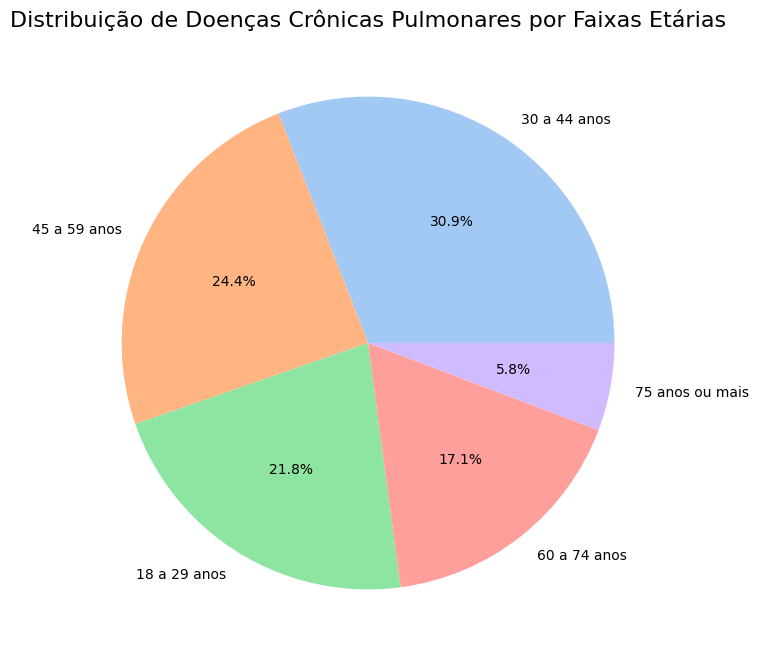

In [56]:
import pandas as pd

import matplotlib.pyplot as plt

# Supondo que o DataFrame `df` já está carregado
# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por faixa etária
contagem_sim = df_sim["faixa_idade"].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_sim, labels=contagem_sim.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por Faixas Etárias', fontsize=16)

# Mostrar o gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13888\624335647.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_sim = df_sim.groupby(['Sexo', 'GrandesRegioes']).size().reset_index(name='counts')


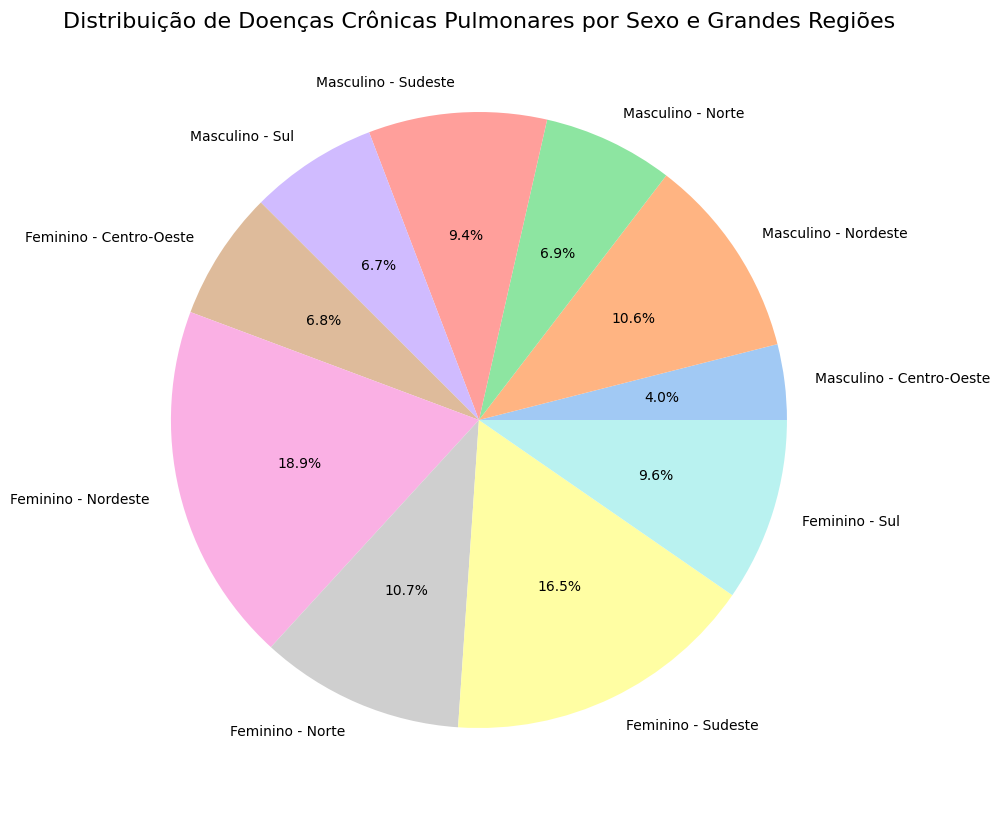

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o DataFrame `df` já está carregado
# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por sexo e região
contagem_sim = df_sim.groupby(['Sexo', 'GrandesRegioes']).size().reset_index(name='counts')

# Preparar os dados para o gráfico de pizza
labels = contagem_sim.apply(lambda x: f"{x['Sexo']} - {x['GrandesRegioes']}", axis=1)
sizes = contagem_sim['counts']

# Criar um gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por Sexo e Grandes Regiões', fontsize=16)

# Mostrar o gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13888\4253440161.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_sim = df_sim.groupby(['Sexo', 'faixa_idade', 'GrandesRegioes']).size().reset_index(name='counts')


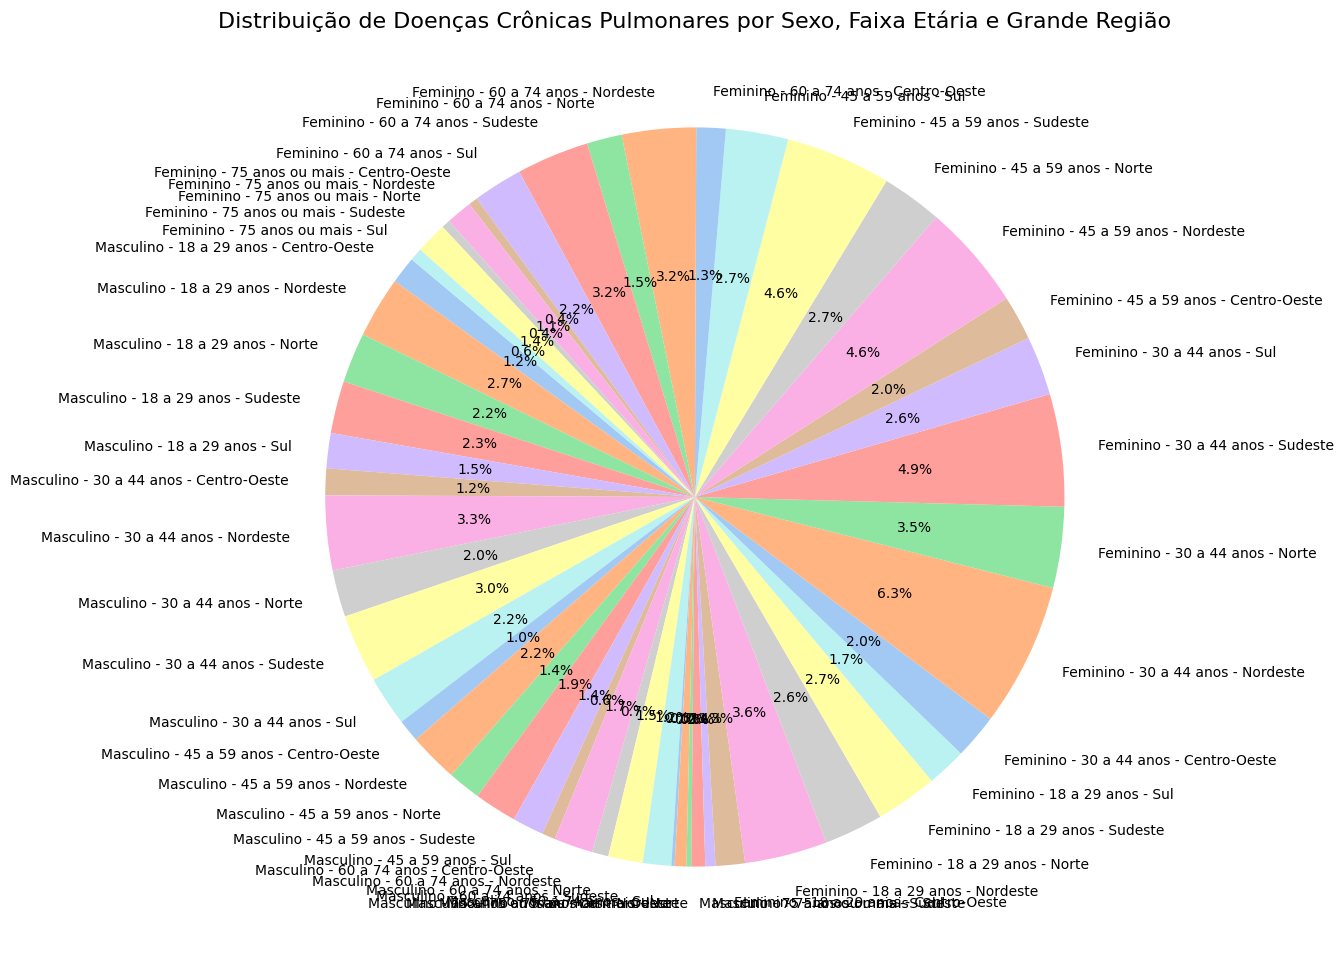

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o DataFrame `df` já está carregado
# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por sexo, faixa etária e região
contagem_sim = df_sim.groupby(['Sexo', 'faixa_idade', 'GrandesRegioes']).size().reset_index(name='counts')

# Preparar os dados para o gráfico de pizza
labels = contagem_sim.apply(lambda x: f"{x['Sexo']} - {x['faixa_idade']} - {x['GrandesRegioes']}", axis=1)
sizes = contagem_sim['counts']

# Criar um gráfico de pizza
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por Sexo, Faixa Etária e Grande Região', fontsize=16)

# Mostrar o gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13888\1965820387.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_sim = df_sim.groupby(['faixa_idade', 'GrandesRegioes']).size().reset_index(name='counts')


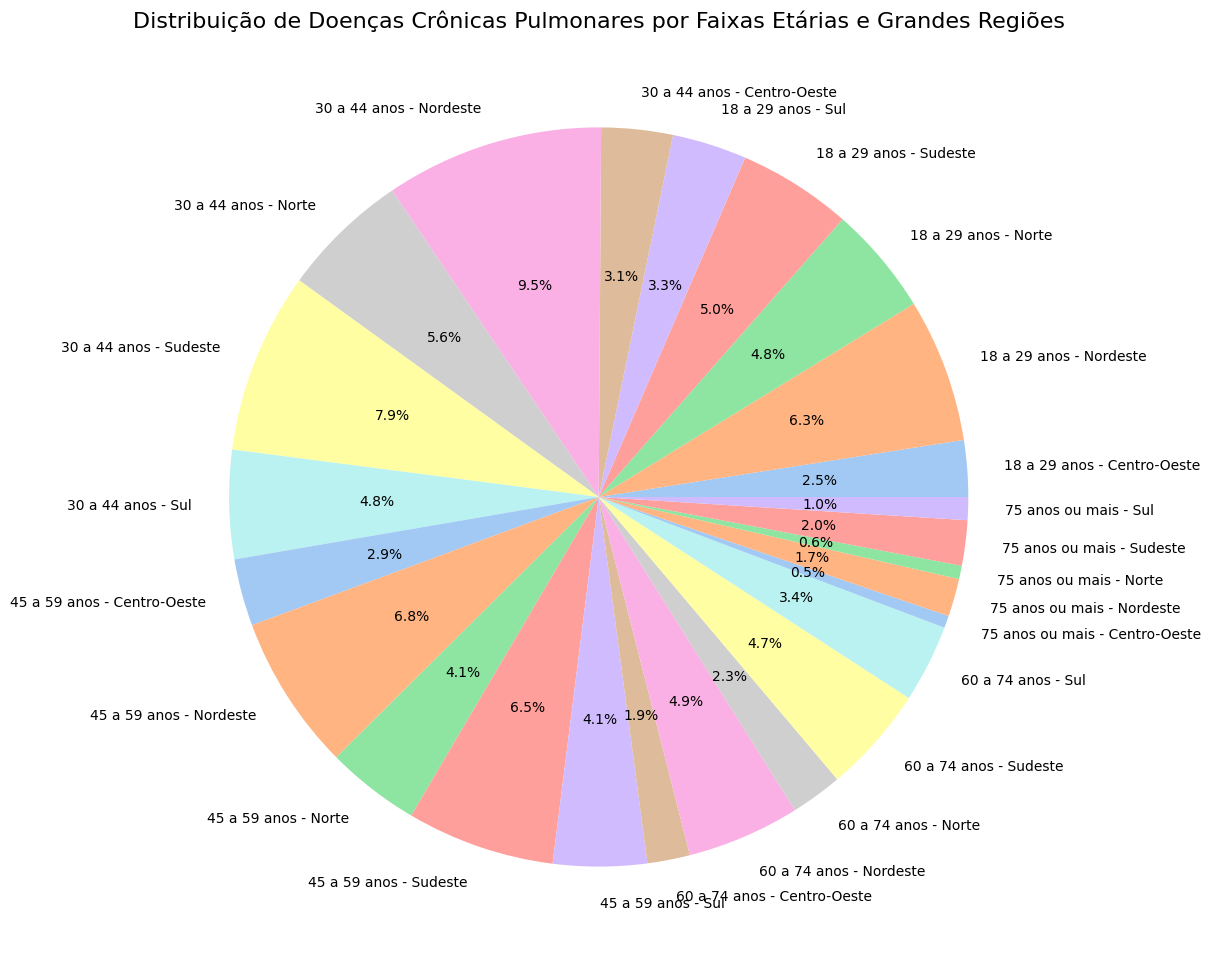

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o DataFrame `df` já está carregado
# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por faixa etária e região
contagem_sim = df_sim.groupby(['faixa_idade', 'GrandesRegioes']).size().reset_index(name='counts')

# Preparar os dados para o gráfico de pizza
labels = contagem_sim.apply(lambda x: f"{x['faixa_idade']} - {x['GrandesRegioes']}", axis=1)
sizes = contagem_sim['counts']

# Criar um gráfico de pizza
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por Faixas Etárias e Grandes Regiões', fontsize=16)

# Mostrar o gráfico
plt.show()


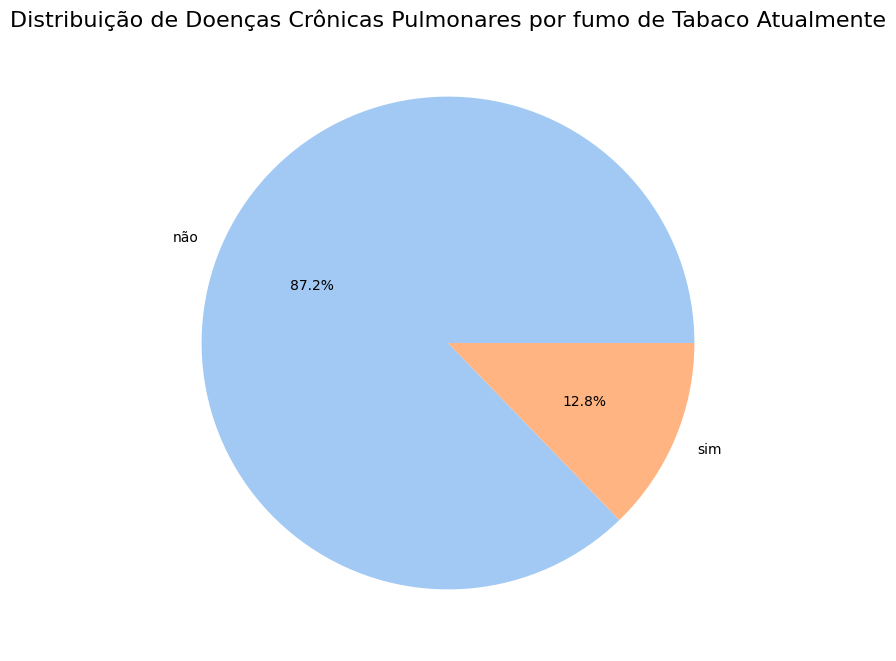

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por região
contagem_sim = df_sim["Atualmente_Fuma_Tabaco"].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_sim, labels=contagem_sim.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por fumo de Tabaco Atualmente', fontsize=16)

# Mostrar o gráfico
plt.show()


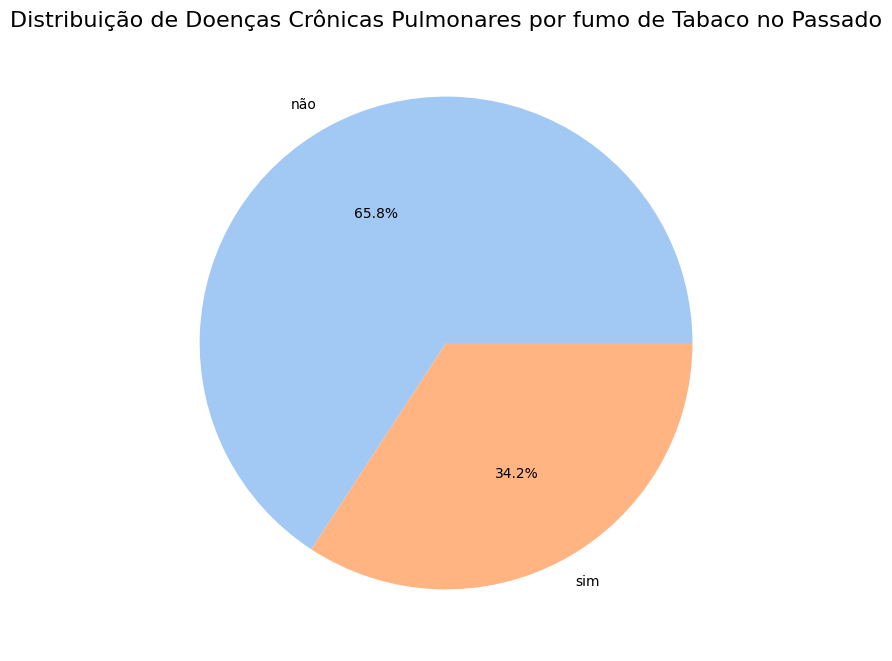

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por região
contagem_sim = df_sim["Passado_Fuma_Tabaco"].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_sim, labels=contagem_sim.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por fumo de Tabaco no Passado', fontsize=16)

# Mostrar o gráfico
plt.show()


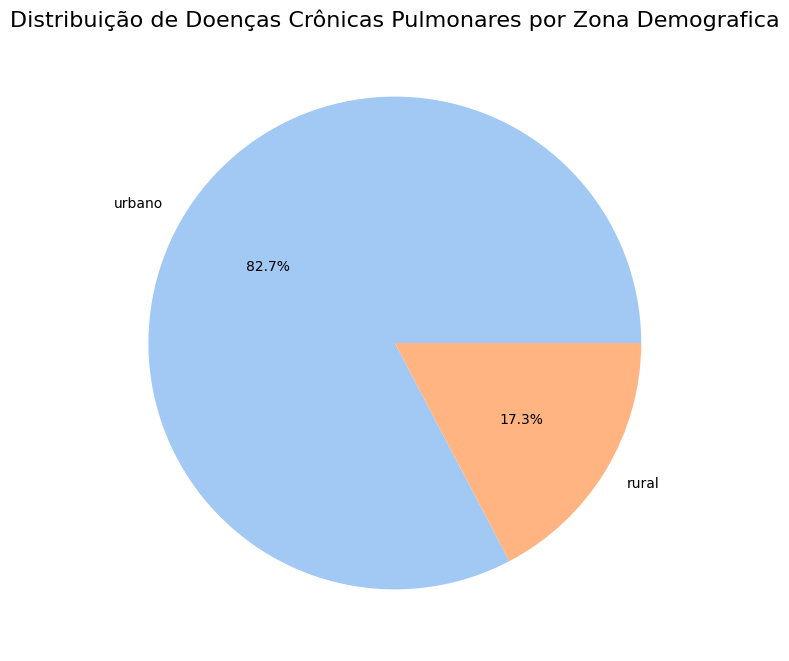

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas respostas "Sim"
df_sim = df[df["Diagnostico_de_Asma_ou_Bronquite"] == "sim"]

# Contar a quantidade de respostas "Sim" por região
contagem_sim = df_sim["Sit_Urbano_Rural"].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_sim, labels=contagem_sim.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Título do gráfico
plt.title('Distribuição de Doenças Crônicas Pulmonares por Zona Demografica', fontsize=16)

# Mostrar o gráfico
plt.show()
